In [488]:
import os
os.chdir(os.getcwd())
os.getcwd()

'/Users/pantchanit/Documents/Pant_Stat_Asign1'

In [489]:
import pandas as pd
import numpy as np
import matplotlib as mpe
import seaborn as sns
%matplotlib inline

In [490]:
country = pd.read_excel('countries_regions.xlsx')
country.head()

,Country Name,Region,ThirdWorld
0,Afghanistan,South Asia,1
1,Albania,Eastern Europe,0
2,Algeria,Africa,0
3,American Samoa,Australia and Oceanea,0
4,Andorra,Western Europe,0


# GET DATA Broadband

In [491]:
broadband1 = pd.read_excel('infrastructure/broadband.xlsx')
broadband1.replace({'..':np.nan},inplace=True)
broadband1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.004814,0.004648,0.004495,0.020535,0.024874,0.025297,0.043041,0.051741,0.068254
1,Albania,ALB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,4.377872,5.493573,6.286818,7.180321,8.402315,9.228641,10.526845,12.555659,15.140735,17.684951
2,Algeria,DZA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,2.675159,3.088892,3.356045,4.109816,5.712209,7.051711,7.756294,7.262935,8.321684,8.643942
3,American Samoa,ASM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,30.762893,32.641004,34.335306,36.319796,39.345733,42.032679,44.524097,46.311976,47.131264,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [492]:
broadband1 = country.join(broadband1[['Country Code', 'Series Name', 'Series Code',
       '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]',
       '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]',
       '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]',
       '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]',
       '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']])
broadband1

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,South Asia,1,AFG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,0.004814,0.004648,0.004495,0.020535,0.024874,0.025297,0.043041,0.051741,0.068254
1,Albania,Eastern Europe,0,ALB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,4.377872,5.493573,6.286818,7.180321,8.402315,9.228641,10.526845,12.555659,15.140735,17.684951
2,Algeria,Africa,0,DZA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,2.675159,3.088892,3.356045,4.109816,5.712209,7.051711,7.756294,7.262935,8.321684,8.643942
3,American Samoa,Australia and Oceanea,0,ASM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,30.762893,32.641004,34.335306,36.319796,39.345733,42.032679,44.524097,46.311976,47.131264,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,VIR,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,8.641729,8.657267,8.574859,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,Middle East,0,PSE,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,3.758487,4.394125,4.916669,5.309577,6.060718,6.917773,7.580678,7.486892,7.324839,7.312678
214,"Yemen, Rep.",Middle East,1,YEM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,0.457837,0.683606,1.021191,1.316631,1.490685,1.016699,1.325692,1.355607,NaN,NaN
215,Zambia,Africa,1,ZMB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,0.117056,0.103691,0.090088,0.133255,0.147298,0.194238,0.213082,0.416259,0.497681,0.447765


<AxesSubplot:>

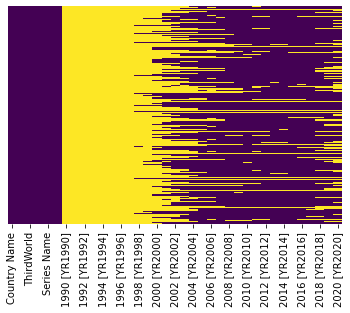

In [493]:
sns.heatmap(broadband1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [494]:
broadband1.drop(['1990 [YR1990]','1991 [YR1991]','1992 [YR1992]','1993 [YR1993]','1994 [YR1994]','1995 [YR1995]','1996 [YR1996]','1997 [YR1997]'],axis=1, inplace=True)
broadband1 = broadband1.dropna()
broadband1

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
18,Belgium,Western Europe,0,BEL,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,0.106708,0.224277,1.402592,4.457895,...,32.175470,33.305275,34.327729,35.746533,36.508424,37.609222,38.345618,39.216863,39.783140,40.848697
26,Brazil,South America,0,BRA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,0.000589,0.004062,0.057211,0.186799,...,9.028728,9.594011,10.625283,11.820828,12.462590,13.028900,13.909125,14.910538,15.592074,17.098593
35,Canada,North America,0,CAN,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,0.466324,1.920633,4.612640,9.183916,...,32.666050,33.474326,34.265299,35.239685,36.404624,36.793328,37.906373,38.963659,40.826166,41.801011
68,France,Western Europe,0,FRA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,0.023037,0.093690,0.333137,1.012897,...,35.982598,37.725626,39.033689,40.454220,41.684509,42.803509,43.921804,44.775767,45.693420,46.921024
86,"Hong Kong SAR, China",East Asia,0,HKG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,0.171420,1.325680,6.727642,10.749580,...,32.811967,32.000676,31.531852,31.974499,32.672339,36.253369,36.380384,36.825535,37.718288,38.296496
98,Japan,East Asia,0,JPN,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,0.025174,0.169643,0.670191,3.002807,...,27.779379,28.135337,28.772070,29.483756,30.372730,31.155736,31.789490,32.622310,33.503380,34.499103
104,"Korea, Rep.",East Asia,0,KOR,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,0.030030,0.591276,8.168134,16.387841,...,35.872464,36.461103,37.217692,37.936629,39.400237,40.318339,41.482202,41.596929,42.764354,43.554782
171,Singapore,Southeast Asia,0,SGP,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,0.259019,0.758583,1.712639,3.703572,...,26.753370,26.684168,27.383059,26.675711,26.576531,28.157111,25.853003,25.941820,25.911659,25.940364
206,United States,North America,0,USA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,0.256527,0.988801,2.509620,4.494889,...,28.344519,29.458940,30.351402,30.692865,31.853820,32.727172,33.283628,33.860368,34.725367,36.413908


<AxesSubplot:>

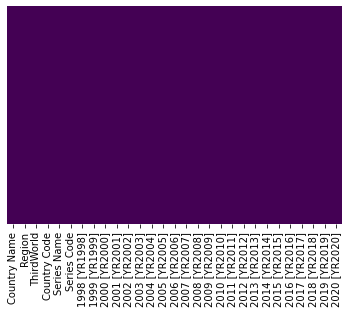

In [495]:
sns.heatmap(broadband1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [496]:
# Removing the outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [497]:
#North America 2005 with outliers

In [498]:
broadband1[broadband1.Region=="North America"]["2010 [YR2010]"].describe()

count     2.000000
mean     29.514953
std       3.058337
min      27.352382
25%      28.433668
50%      29.514953
75%      30.596239
max      31.677525
Name: 2010 [YR2010], dtype: float64

array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

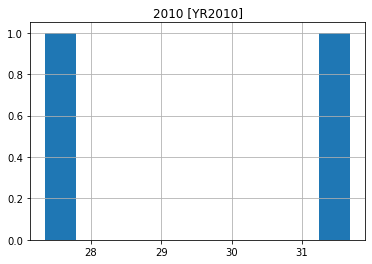

In [499]:
broadband1[broadband1.Region=="North America"].hist(column='2010 [YR2010]')

In [500]:
#North America 2000 without outliers

In [501]:
NA_broadband_without_2010 = broadband1[broadband1.Region=="North America"]
NA_broadband_without_2010 = NA_broadband_without_2010[["Country Name","Region","2010 [YR2010]"]]
NA_broadband_without_2010

,Country Name,Region,2010 [YR2010]
35,Canada,North America,31.677525
206,United States,North America,27.352382


In [502]:
upper, lower = outliers(NA_broadband_without_2010, "2010 [YR2010]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_broadband_without_2010 = NA_broadband_without_2010[(NA_broadband_without_2010["2010 [YR2010]"] > lower) & (NA_broadband_without_2010["2010 [YR2010]"] < upper)]
NA_broadband_without_2010

Upper whisker:  33.84009581000001
Lower Whisker:  25.189811129999995


,Country Name,Region,2010 [YR2010]
35,Canada,North America,31.677525
206,United States,North America,27.352382


array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

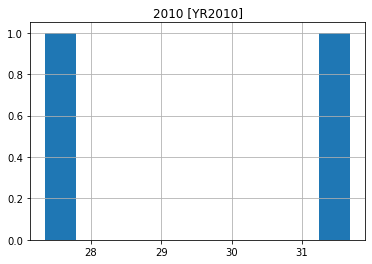

In [503]:
NA_broadband_without_2010.hist()

In [504]:
NA_broadband_without_2010.describe()

,2010 [YR2010]
count,2.000000
mean,29.514953
std,3.058337
min,27.352382
25%,28.433668
50%,29.514953
75%,30.596239
max,31.677525


In [505]:
#North America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

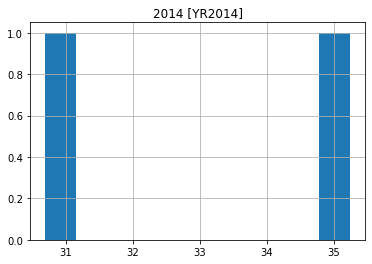

In [506]:
broadband1[broadband1.Region=="North America"].hist(column='2014 [YR2014]')

In [507]:
broadband1[broadband1.Region=="North America"]['2014 [YR2014]'].describe()

count     2.000000
mean     32.966275
std       3.215087
min      30.692865
25%      31.829570
50%      32.966275
75%      34.102980
max      35.239685
Name: 2014 [YR2014], dtype: float64

In [508]:
#North America 2014 with outliers

In [509]:
NA_broadband_without_2014 = broadband1[broadband1.Region=="North America"]
NA_broadband_without_2014 = NA_broadband_without_2014[["Country Name","Region","2014 [YR2014]"]]
NA_broadband_without_2014

,Country Name,Region,2014 [YR2014]
35,Canada,North America,35.239685
206,United States,North America,30.692865


In [510]:
upper, lower = outliers(NA_broadband_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_broadband_without_2014 = NA_broadband_without_2014[(NA_broadband_without_2014["2014 [YR2014]"] > lower) & (NA_broadband_without_2014["2014 [YR2014]"] < upper)]
NA_broadband_without_2014

Upper whisker:  37.513094899999984
Lower Whisker:  28.41945510000001


,Country Name,Region,2014 [YR2014]
35,Canada,North America,35.239685
206,United States,North America,30.692865


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

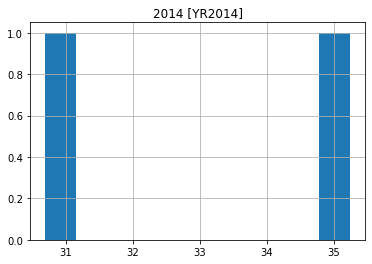

In [511]:
NA_broadband_without_2014.hist()

In [512]:
NA_broadband_without_2014.describe()

,2014 [YR2014]
count,2.000000
mean,32.966275
std,3.215087
min,30.692865
25%,31.829570
50%,32.966275
75%,34.102980
max,35.239685


In [513]:
#South America 2010 with outliers

array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

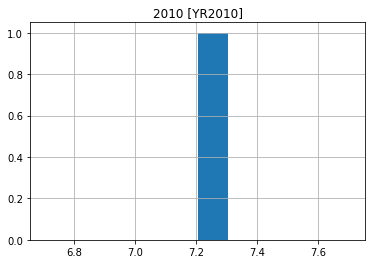

In [514]:
broadband1[broadband1.Region=="South America"].hist(column='2010 [YR2010]')

In [515]:
#South America 2010 without outliers

In [516]:
SA_broadband_without_2010 = broadband1[broadband1.Region=="South America"]
SA_broadband_without_2010 = SA_broadband_without_2010[["Country Name","Region","2010 [YR2010]"]]
SA_broadband_without_2010

,Country Name,Region,2010 [YR2010]
26,Brazil,South America,7.204858


In [517]:
upper, lower = outliers(SA_broadband_without_2010, "2010 [YR2010]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_broadband_without_2010 = SA_broadband_without_2010[(SA_broadband_without_2010["2010 [YR2010]"] > lower) & (SA_broadband_without_2010["2010 [YR2010]"] < upper)]
SA_broadband_without_2010

Upper whisker:  7.204858261
Lower Whisker:  7.204858261


,Country Name,Region,2010 [YR2010]


array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

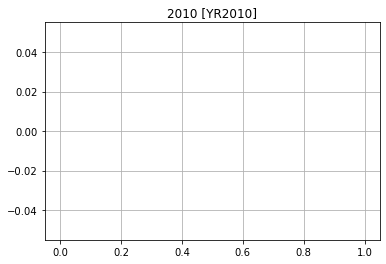

In [518]:
SA_broadband_without_2010.hist()

In [519]:
#South America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

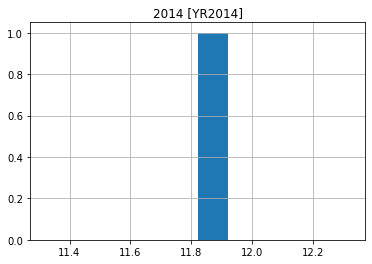

In [520]:
broadband1[broadband1.Region=="South America"].hist(column='2014 [YR2014]')

In [521]:
#South America 2014 without outliers

In [522]:
SA_broadband_without_2014 = broadband1[broadband1.Region=="South America"]
SA_broadband_without_2014 = SA_broadband_without_2014[["Country Name","Region","2014 [YR2014]"]]
SA_broadband_without_2014

,Country Name,Region,2014 [YR2014]
26,Brazil,South America,11.820828


In [523]:
upper, lower = outliers(SA_broadband_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_broadband_without_2014 = SA_broadband_without_2014[(SA_broadband_without_2014["2014 [YR2014]"] > lower) & (SA_broadband_without_2014["2014 [YR2014]"] < upper)]
SA_broadband_without_2014

Upper whisker:  11.82082759
Lower Whisker:  11.82082759


,Country Name,Region,2014 [YR2014]


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

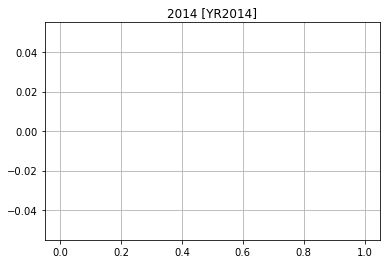

In [524]:
SA_broadband_without_2014.hist()

In [525]:
#Western Asia 2010 with outliers

array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

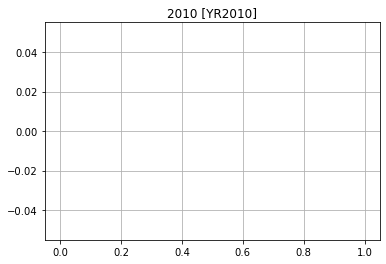

In [526]:
broadband1[broadband1.Region=="Western Asia"].hist(column='2010 [YR2010]')

In [527]:
#Western Asia 2010 without outliers

In [528]:
WA_broadband_without_2010 = broadband1[broadband1.Region=="Western Asia"]
WA_broadband_without_2010 = WA_broadband_without_2010[["Country Name","Region","2010 [YR2010]"]]
WA_broadband_without_2010

,Country Name,Region,2010 [YR2010]


In [529]:
upper, lower = outliers(WA_broadband_without_2010, "2010 [YR2010]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_broadband_without_2010 = WA_broadband_without_2010[(WA_broadband_without_2010["2010 [YR2010]"] > lower) & (WA_broadband_without_2010["2010 [YR2010]"] < upper)]
WA_broadband_without_2010

Upper whisker:  nan
Lower Whisker:  nan


,Country Name,Region,2010 [YR2010]


array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

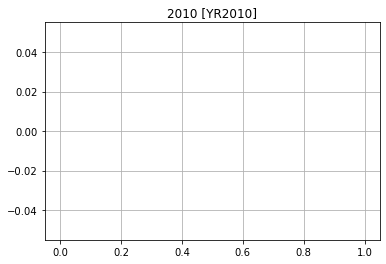

In [530]:
WA_broadband_without_2010.hist()

In [531]:
#Western Asia 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

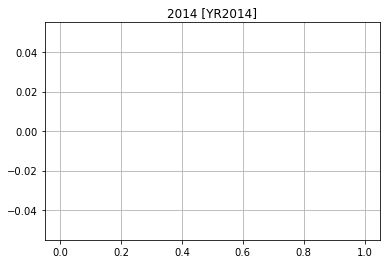

In [532]:
broadband1[broadband1.Region=="Western Asia"].hist(column='2014 [YR2014]')

In [533]:
#Western Asia 2014 without outliers

In [534]:
WA_broadband_without_2014 = broadband1[broadband1.Region=="Western Asia"]
WA_broadband_without_2014 = WA_broadband_without_2014[["Country Name","Region","2014 [YR2014]"]]
WA_broadband_without_2014

,Country Name,Region,2014 [YR2014]


In [535]:
upper, lower = outliers(WA_broadband_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_broadband_without_2014 = WA_broadband_without_2014[(WA_broadband_without_2014["2014 [YR2014]"] > lower) & (WA_broadband_without_2014["2014 [YR2014]"] < upper)]
WA_broadband_without_2014

Upper whisker:  nan
Lower Whisker:  nan


,Country Name,Region,2014 [YR2014]


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

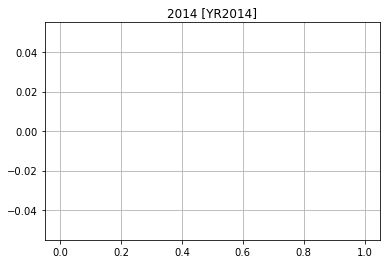

In [536]:
WA_broadband_without_2014.hist()

# GET DATA Electricity

In [537]:
electricity1 = pd.read_excel('infrastructure/electricity.xlsx')
electricity1.replace({'..':np.nan},inplace=True)
electricity1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,596.407959,663.783995,...,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,531.583836,532.490560,559.783013,547.990472,550.971960,559.917891,...,1123.332915,1237.966109,1278.915242,1362.871884,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [538]:
electricity1 = country.join(electricity1[['Country Code', 'Series Name', 'Series Code',
       '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]',
       '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]',
       '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]',
       '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]',
       '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']])
electricity1

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,South Asia,1,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Eastern Europe,0,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,...,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,0,DZA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,531.583836,532.490560,559.783013,547.990472,...,1123.332915,1237.966109,1278.915242,1362.871884,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,Australia and Oceanea,0,ASM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,VIR,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,Middle East,0,PSE,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,"Yemen, Rep.",Middle East,1,YEM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,125.619268,133.310280,134.242622,136.569517,...,193.803773,193.804024,250.963212,219.799897,NaN,NaN,NaN,NaN,NaN,NaN
215,Zambia,Africa,1,ZMB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,761.865751,736.782955,735.740792,740.600918,...,631.738878,733.210611,747.058044,717.347305,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

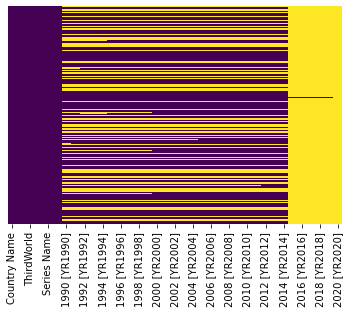

In [539]:
sns.heatmap(electricity1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [540]:
electricity1.drop(['2015 [YR2015]','2016 [YR2016]','2017 [YR2017]','2018 [YR2018]','2019 [YR2019]','2020 [YR2020]'],axis=1, inplace=True)
electricity1 = electricity1.dropna()
electricity1.head()

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
1,Albania,Eastern Europe,0,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,...,1722.072850,1218.360146,1213.124369,1617.744156,1835.684072,1943.343354,2205.703920,2118.327776,2533.252829,2309.366503
2,Algeria,Africa,0,DZA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,531.583836,532.490560,559.783013,547.990472,...,890.625924,862.429594,894.284586,947.291328,866.307302,1016.636782,1123.332915,1237.966109,1278.915242,1362.871884
5,Angola,Africa,1,AGO,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,53.171804,54.453865,53.486663,52.007473,...,109.295219,144.715322,133.267258,172.384898,189.257704,206.454402,207.013351,219.253483,280.214482,312.228895
7,Argentina,South America,0,ARG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1303.978019,1347.592046,1410.377544,1496.904499,...,2408.432958,2374.097592,2455.656081,2772.843291,2730.123367,2877.652653,2929.075029,3000.603523,2967.376558,3074.702071
8,Armenia,Western Asia,0,ARM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2722.598500,2689.680533,1962.635282,1195.024488,...,1521.503310,1639.792570,1773.161496,1669.409464,1661.303268,1726.262758,1807.034572,1892.006869,1931.258117,1961.610395


<AxesSubplot:>

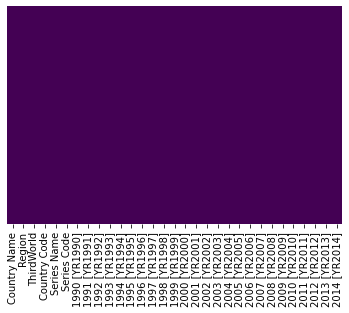

In [541]:
sns.heatmap(electricity1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [542]:
#North America 2010 with outliers

array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

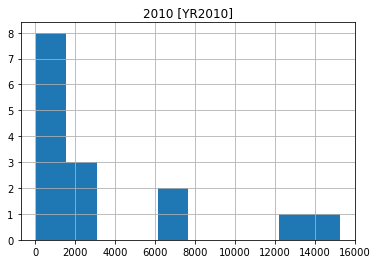

In [543]:
electricity1[electricity1.Region=="North America"].hist(column='2010 [YR2010]')

In [544]:
#North America 2010 without outliers

In [545]:
NA_electricity_without_2010 = electricity1[electricity1.Region=="North America"]
NA_electricity_without_2010 = NA_electricity_without_2010[["Country Name","Region","2010 [YR2010]"]]
NA_electricity_without_2010

,Country Name,Region,2010 [YR2010]
35,Canada,North America,15269.745477
46,Costa Rica,North America,1887.983299
49,Cuba,North America,1303.154964
50,Curacao,North America,7471.268233
56,Dominican Republic,North America,1394.825870
59,El Salvador,North America,857.067500
80,Guatemala,North America,556.043060
84,Haiti,North America,24.524294
85,Honduras,North America,617.856374
97,Jamaica,North America,1216.169287


In [546]:
upper, lower = outliers(NA_electricity_without_2010, "2010 [YR2010]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_electricity_without_2010 = NA_electricity_without_2010[(NA_electricity_without_2010["2010 [YR2010]"] > lower) & (NA_electricity_without_2010["2010 [YR2010]"] < upper)]
NA_electricity_without_2010

Upper whisker:  9153.701303361486
Lower Whisker:  -4312.281683049925


,Country Name,Region,2010 [YR2010]
46,Costa Rica,North America,1887.983299
49,Cuba,North America,1303.154964
50,Curacao,North America,7471.268233
56,Dominican Republic,North America,1394.825870
59,El Salvador,North America,857.067500
80,Guatemala,North America,556.043060
84,Haiti,North America,24.524294
85,Honduras,North America,617.856374
97,Jamaica,North America,1216.169287
127,Mexico,North America,2018.827437


array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

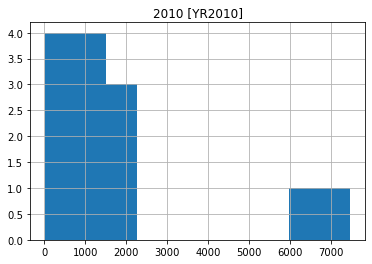

In [547]:
NA_electricity_without_2010.hist()

In [548]:
#North America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

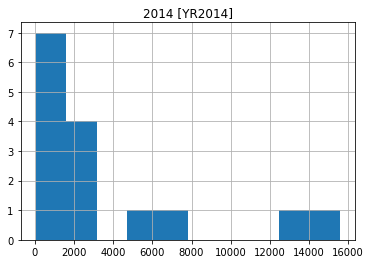

In [549]:
electricity1[electricity1.Region=="North America"].hist(column='2014 [YR2014]')

In [550]:
#North America 2014 without outliers

In [551]:
NA_electricity_without_2014 = electricity1[electricity1.Region=="North America"]
NA_electricity_without_2014 = NA_electricity_without_2014[["Country Name","Region","2014 [YR2014]"]]
NA_electricity_without_2014

,Country Name,Region,2014 [YR2014]
35,Canada,North America,15588.487146
46,Costa Rica,North America,1942.490600
49,Cuba,North America,1450.882819
50,Curacao,North America,4797.670436
56,Dominican Republic,North America,1615.514607
59,El Salvador,North America,937.074472
80,Guatemala,North America,601.189731
84,Haiti,North America,39.055809
85,Honduras,North America,619.837087
97,Jamaica,North America,1050.732539


In [552]:
upper, lower = outliers(NA_electricity_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_electricity_without_2014 = NA_electricity_without_2014[(NA_electricity_without_2014["2014 [YR2014]"] > lower) & (NA_electricity_without_2014["2014 [YR2014]"] < upper)]
NA_electricity_without_2014

Upper whisker:  7526.059109893906
Lower Whisker:  -3270.1062185208984


,Country Name,Region,2014 [YR2014]
46,Costa Rica,North America,1942.490600
49,Cuba,North America,1450.882819
50,Curacao,North America,4797.670436
56,Dominican Republic,North America,1615.514607
59,El Salvador,North America,937.074472
80,Guatemala,North America,601.189731
84,Haiti,North America,39.055809
85,Honduras,North America,619.837087
97,Jamaica,North America,1050.732539
127,Mexico,North America,2157.323788


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

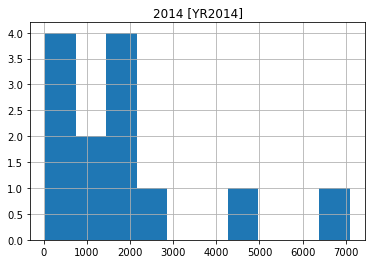

In [553]:
NA_electricity_without_2014.hist()

In [554]:
#South America 2010 with outliers

array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

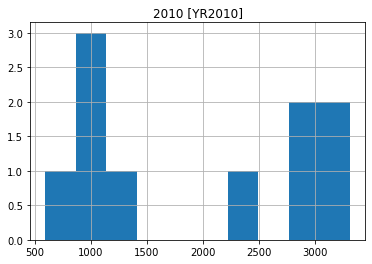

In [555]:
electricity1[electricity1.Region=="South America"].hist(column='2010 [YR2010]')

In [556]:
#South America 2010 without outliers

In [557]:
SA_electricity_without_2010 = electricity1[electricity1.Region=="South America"]
SA_electricity_without_2010 = SA_electricity_without_2010[["Country Name","Region","2010 [YR2010]"]]
SA_electricity_without_2010

,Country Name,Region,2010 [YR2010]
7,Argentina,South America,2877.652653
23,Bolivia,South America,596.501183
26,Brazil,South America,2374.116628
40,Chile,South America,3306.953699
42,Colombia,South America,1094.560942
57,Ecuador,South America,1137.956850
153,Paraguay,South America,1171.411665
154,Peru,South America,1107.356840
207,Uruguay,South America,2815.787821
210,"Venezuela, RB",South America,3195.681623


In [558]:
upper, lower = outliers(SA_electricity_without_2010, "2010 [YR2010]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_electricity_without_2010 = SA_electricity_without_2010[(SA_electricity_without_2010["2010 [YR2010]"] > lower) & (SA_electricity_without_2010["2010 [YR2010]"] < upper)]
SA_electricity_without_2010

Upper whisker:  5482.955849143498
Lower Whisker:  -1505.7625614405474


,Country Name,Region,2010 [YR2010]
7,Argentina,South America,2877.652653
23,Bolivia,South America,596.501183
26,Brazil,South America,2374.116628
40,Chile,South America,3306.953699
42,Colombia,South America,1094.560942
57,Ecuador,South America,1137.956850
153,Paraguay,South America,1171.411665
154,Peru,South America,1107.356840
207,Uruguay,South America,2815.787821
210,"Venezuela, RB",South America,3195.681623


array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

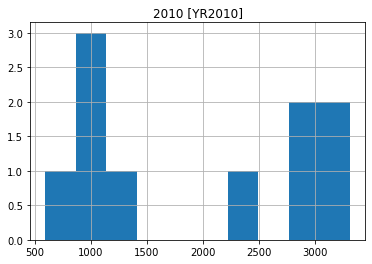

In [559]:
SA_electricity_without_2010.hist()

In [560]:
#South America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

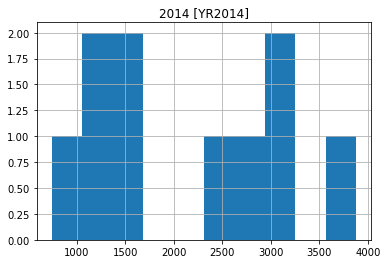

In [561]:
electricity1[electricity1.Region=="South America"].hist(column='2014 [YR2014]')

In [562]:
#South America 2014 without outliers

In [563]:
SA_electricity_without_2014 = electricity1[electricity1.Region=="South America"]
SA_electricity_without_2014 = SA_electricity_without_2014[["Country Name","Region","2014 [YR2014]"]]
SA_electricity_without_2014

,Country Name,Region,2014 [YR2014]
7,Argentina,South America,3074.702071
23,Bolivia,South America,742.538400
26,Brazil,South America,2619.960499
40,Chile,South America,3879.673420
42,Colombia,South America,1312.199493
57,Ecuador,South America,1376.393633
153,Paraguay,South America,1552.384687
154,Peru,South America,1345.879007
207,Uruguay,South America,3085.189883
210,"Venezuela, RB",South America,2719.138349


In [564]:
upper, lower = outliers(SA_electricity_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_electricity_without_2014 = SA_electricity_without_2014[(SA_electricity_without_2014["2014 [YR2014]"] > lower) & (SA_electricity_without_2014["2014 [YR2014]"] < upper)]
SA_electricity_without_2014

Upper whisker:  5434.2663546633685
Lower Whisker:  -1094.9475506914348


,Country Name,Region,2014 [YR2014]
7,Argentina,South America,3074.702071
23,Bolivia,South America,742.538400
26,Brazil,South America,2619.960499
40,Chile,South America,3879.673420
42,Colombia,South America,1312.199493
57,Ecuador,South America,1376.393633
153,Paraguay,South America,1552.384687
154,Peru,South America,1345.879007
207,Uruguay,South America,3085.189883
210,"Venezuela, RB",South America,2719.138349


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

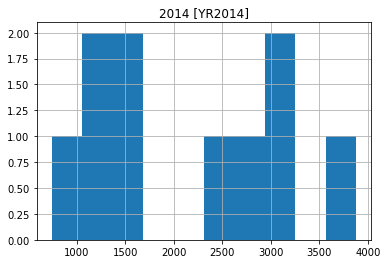

In [565]:
SA_electricity_without_2014.hist()

In [566]:
#Western Asia 2010 with outliers

array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

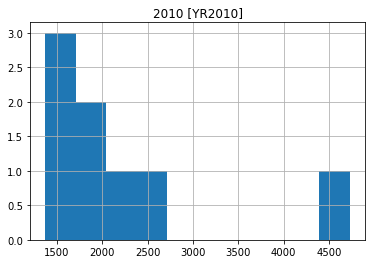

In [567]:
electricity1[electricity1.Region=="Western Asia"].hist(column='2010 [YR2010]')

In [568]:
#Western Asia 2010 without outliers

In [569]:
WA_electricity_without_2010 = electricity1[electricity1.Region=="Western Asia"]
WA_electricity_without_2010 = WA_electricity_without_2010[["Country Name","Region","2010 [YR2010]"]]
WA_electricity_without_2010

,Country Name,Region,2010 [YR2010]
8,Armenia,Western Asia,1726.262758
12,Azerbaijan,Western Asia,1603.431374
72,Georgia,Western Asia,2049.544524
100,Kazakhstan,Western Asia,4728.011591
107,Kyrgyz Republic,Western Asia,1371.721214
190,Tajikistan,Western Asia,1893.217536
199,Turkmenistan,Western Asia,2382.051777
208,Uzbekistan,Western Asia,1653.467496


In [570]:
upper, lower = outliers(WA_electricity_without_2010, "2010 [YR2010]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_electricity_without_2010 = WA_electricity_without_2010[(WA_electricity_without_2010["2010 [YR2010]"] > lower) & (WA_electricity_without_2010["2010 [YR2010]"] < upper)]
WA_electricity_without_2010

Upper whisker:  2870.2406441980856
Lower Whisker:  903.389157981498


,Country Name,Region,2010 [YR2010]
8,Armenia,Western Asia,1726.262758
12,Azerbaijan,Western Asia,1603.431374
72,Georgia,Western Asia,2049.544524
107,Kyrgyz Republic,Western Asia,1371.721214
190,Tajikistan,Western Asia,1893.217536
199,Turkmenistan,Western Asia,2382.051777
208,Uzbekistan,Western Asia,1653.467496


array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

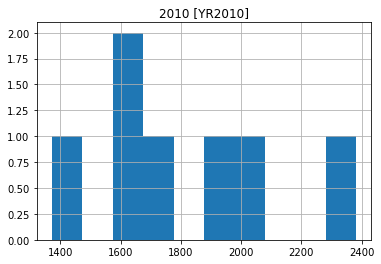

In [571]:
WA_electricity_without_2010.hist()

In [572]:
#Western Asia 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

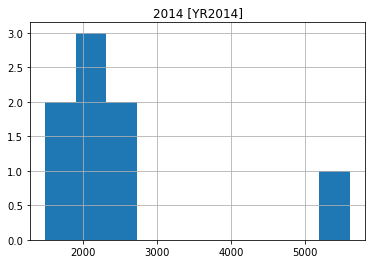

In [573]:
electricity1[electricity1.Region=="Western Asia"].hist(column='2014 [YR2014]')

In [574]:
#Western Asia 2014 without outliers

In [575]:
WA_electricity_without_2014 = electricity1[electricity1.Region=="Western Asia"]
WA_electricity_without_2014 = WA_electricity_without_2014[["Country Name","Region","2014 [YR2014]"]]
WA_electricity_without_2014

,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,1961.610395
12,Azerbaijan,Western Asia,2202.393918
72,Georgia,Western Asia,2693.972760
100,Kazakhstan,Western Asia,5600.208465
107,Kyrgyz Republic,Western Asia,1941.221832
190,Tajikistan,Western Asia,1499.485994
199,Turkmenistan,Western Asia,2678.765474
208,Uzbekistan,Western Asia,1645.441629


In [576]:
upper, lower = outliers(WA_electricity_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_electricity_without_2014 = WA_electricity_without_2014[(WA_electricity_without_2014["2014 [YR2014]"] > lower) & (WA_electricity_without_2014["2014 [YR2014]"] < upper)]
WA_electricity_without_2014

Upper whisker:  3905.5030667364827
Lower Whisker:  644.3410099275495


,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,1961.610395
12,Azerbaijan,Western Asia,2202.393918
72,Georgia,Western Asia,2693.972760
107,Kyrgyz Republic,Western Asia,1941.221832
190,Tajikistan,Western Asia,1499.485994
199,Turkmenistan,Western Asia,2678.765474
208,Uzbekistan,Western Asia,1645.441629


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

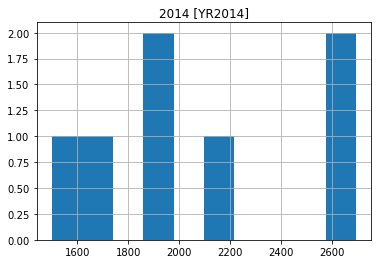

In [577]:
WA_electricity_without_2014.hist()

# GET DATA Mobile

In [578]:
mobile1 = pd.read_excel('infrastructure/mobile.xlsx')
mobile1.replace({'..':np.nan},inplace=True)
mobile1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,45.813626,49.227977,52.083576,55.159515,57.271068,61.054638,65.929134,59.120848,59.356020,58.255812
1,Albania,ALB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,105.852915,120.105858,126.936969,115.997935,117.659218,116.744444,125.710352,94.176998,91.293015,91.002944
2,Algeria,DZA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.001825,0.01811,0.017689,0.017300,0.004778,0.016312,...,97.148178,100.384679,103.610140,111.238610,108.808940,116.004208,110.767246,111.664792,105.510594,103.887317
3,American Samoa,ASM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.402918,1.764014,2.303484,2.351348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.307567,1.279297,1.250858,4.424432,...,77.667260,77.480680,79.147993,83.623900,91.443514,98.492826,104.332411,107.282549,113.957377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [579]:
mobile1 = country.join(mobile1[['Country Code', 'Series Name', 'Series Code',
       '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]',
       '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]',
       '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]',
       '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]',
       '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']])
mobile1

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,South Asia,1,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,...,45.813626,49.227977,52.083576,55.159515,57.271068,61.054638,65.929134,59.120848,59.356020,58.255812
1,Albania,Eastern Europe,0,ALB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,...,105.852915,120.105858,126.936969,115.997935,117.659218,116.744444,125.710352,94.176998,91.293015,91.002944
2,Algeria,Africa,0,DZA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.001825,0.01811,0.017689,0.017300,...,97.148178,100.384679,103.610140,111.238610,108.808940,116.004208,110.767246,111.664792,105.510594,103.887317
3,American Samoa,Australia and Oceanea,0,ASM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.402918,1.764014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.307567,1.279297,...,77.667260,77.480680,79.147993,83.623900,91.443514,98.492826,104.332411,107.282549,113.957377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,VIR,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,Middle East,0,PSE,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,NaN,0.000000,0.000000,...,69.523085,73.904186,73.617539,72.201640,77.961373,80.100672,84.179796,89.975754,86.325385,83.658511
214,"Yemen, Rep.",Middle East,1,YEM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.011965,0.037920,...,49.009585,56.796874,66.984638,66.218793,56.691131,60.486341,55.175024,53.678933,NaN,NaN
215,Zambia,Africa,1,ZMB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,...,58.221742,72.758845,69.646403,65.681859,72.784572,73.438230,79.736910,89.157044,96.414412,103.917835


<AxesSubplot:>

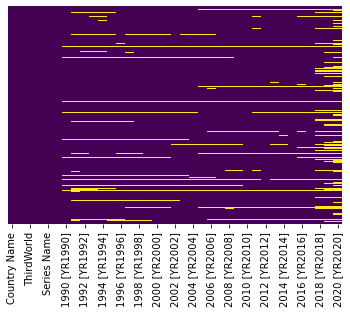

In [580]:
sns.heatmap(mobile1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [581]:
mobile1 = mobile1.dropna()
mobile1

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,South Asia,1,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.000000,0.000000,0.000000,...,45.813626,49.227977,52.083576,55.159515,57.271068,61.054638,65.929134,59.120848,59.356020,58.255812
1,Albania,Eastern Europe,0,ALB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.000000,0.000000,0.000000,...,105.852915,120.105858,126.936969,115.997935,117.659218,116.744444,125.710352,94.176998,91.293015,91.002944
2,Algeria,Africa,0,DZA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.001825,0.018110,0.017689,0.017300,...,97.148178,100.384679,103.610140,111.238610,108.808940,116.004208,110.767246,111.664792,105.510594,103.887317
5,Angola,Africa,1,AGO,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.000000,0.000000,0.008413,...,49.846773,50.920600,51.065920,52.158983,49.793223,45.076290,44.686107,43.130519,46.598638,44.559511
7,Argentina,South America,0,ARG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.036789,0.075577,0.138953,0.329702,...,146.955455,154.059023,159.639461,143.615832,143.566834,146.453828,140.877124,132.093151,125.842106,121.170400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Vanuatu,Australia and Oceanea,1,VUT,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.000000,0.000000,0.000000,...,56.441091,58.550936,49.581702,59.135315,64.477557,78.540941,79.862702,85.905426,88.441120,80.167999
210,"Venezuela, RB",South America,0,VEN,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.037804,0.082602,0.382144,0.868825,...,99.633497,104.115128,103.744124,101.614534,96.714588,92.461416,83.304822,71.766138,64.792912,63.400007
211,Vietnam,Southeast Asia,0,VNM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.000000,0.001129,0.005615,...,143.261020,146.626837,136.343827,148.448819,129.831515,128.790785,126.866130,147.195273,141.226863,142.733362
215,Zambia,Africa,1,ZMB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.000000,0.000000,0.000000,...,58.221742,72.758845,69.646403,65.681859,72.784572,73.438230,79.736910,89.157044,96.414412,103.917835


<AxesSubplot:>

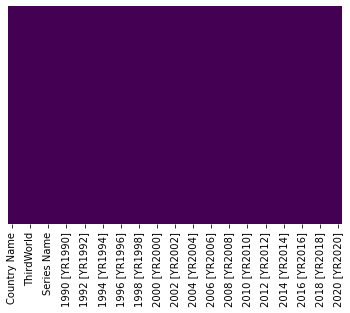

In [582]:
sns.heatmap(mobile1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [583]:
#North America 2010 with outliers

array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

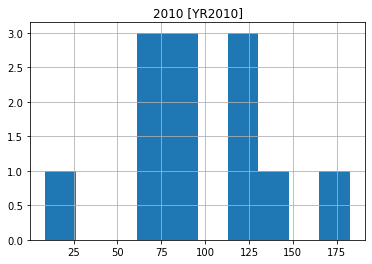

In [584]:
mobile1[mobile1.Region=="North America"].hist(column='2010 [YR2010]')

In [585]:
#North America 2010 without outliers

In [586]:
NA_mobile_without_2010 = mobile1[mobile1.Region=="North America"]
NA_mobile_without_2010 = NA_mobile_without_2010[["Country Name","Region","2010 [YR2010]"]]
NA_mobile_without_2010

,Country Name,Region,2010 [YR2010]
35,Canada,North America,75.628821
46,Costa Rica,North America,68.344192
49,Cuba,North America,8.934883
56,Dominican Republic,North America,91.724312
80,Guatemala,North America,123.495933
85,Honduras,North America,114.278392
97,Jamaica,North America,113.219722
127,Mexico,North America,80.095644
142,Nicaragua,North America,68.032328
151,Panama,North America,182.457290


In [587]:
upper, lower = outliers(NA_mobile_without_2010, "2010 [YR2010]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_mobile_without_2010 = NA_mobile_without_2010[(NA_mobile_without_2010["2010 [YR2010]"] > lower) & (NA_mobile_without_2010["2010 [YR2010]"] < upper)]
NA_mobile_without_2010

Upper whisker:  180.74544843874997
Lower Whisker:  9.644992668750007


,Country Name,Region,2010 [YR2010]
35,Canada,North America,75.628821
46,Costa Rica,North America,68.344192
56,Dominican Republic,North America,91.724312
80,Guatemala,North America,123.495933
85,Honduras,North America,114.278392
97,Jamaica,North America,113.219722
127,Mexico,North America,80.095644
142,Nicaragua,North America,68.032328
158,Puerto Rico,North America,81.958612
196,Trinidad and Tobago,North America,142.622767


array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

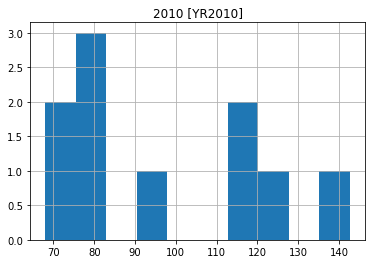

In [588]:
NA_mobile_without_2010.hist()

In [589]:
#North America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

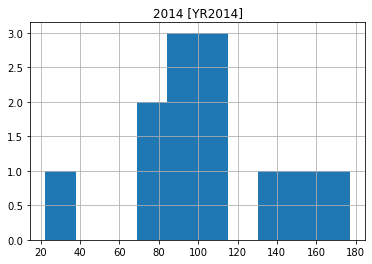

In [590]:
mobile1[mobile1.Region=="North America"].hist(column='2014 [YR2014]')

In [591]:
#North America 2014 without outliers

In [592]:
NA_mobile_without_2014 = mobile1[mobile1.Region=="North America"]
NA_mobile_without_2014 = NA_mobile_without_2014[["Country Name","Region","2014 [YR2014]"]]
NA_mobile_without_2014

,Country Name,Region,2014 [YR2014]
35,Canada,North America,80.722095
46,Costa Rica,North America,146.399004
49,Cuba,North America,22.382360
56,Dominican Republic,North America,81.686045
80,Guatemala,North America,106.208380
85,Honduras,North America,86.260010
97,Jamaica,North America,104.533729
127,Mexico,North America,87.198893
142,Nicaragua,North America,115.060549
151,Panama,North America,177.019589


In [593]:
upper, lower = outliers(NA_mobile_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_mobile_without_2014 = NA_mobile_without_2014[(NA_mobile_without_2014["2014 [YR2014]"] > lower) & (NA_mobile_without_2014["2014 [YR2014]"] < upper)]
NA_mobile_without_2014

Upper whisker:  178.92573830875
Lower Whisker:  28.830987618749994


,Country Name,Region,2014 [YR2014]
35,Canada,North America,80.722095
46,Costa Rica,North America,146.399004
56,Dominican Republic,North America,81.686045
80,Guatemala,North America,106.208380
85,Honduras,North America,86.260010
97,Jamaica,North America,104.533729
127,Mexico,North America,87.198893
142,Nicaragua,North America,115.060549
151,Panama,North America,177.019589
158,Puerto Rico,North America,92.910502


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

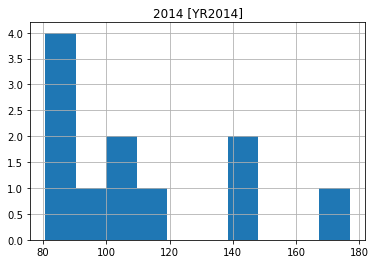

In [594]:
NA_mobile_without_2014.hist()

In [595]:
#South America 2010 with outliers

array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

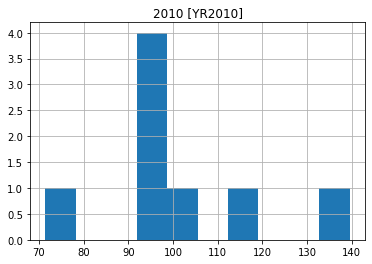

In [596]:
mobile1[mobile1.Region=="South America"].hist(column='2010 [YR2010]')

In [597]:
#South America 2010 without outliers

In [598]:
SA_mobile_without_2010 = mobile1[mobile1.Region=="South America"]
SA_mobile_without_2010 = SA_mobile_without_2010[["Country Name","Region","2010 [YR2010]"]]
SA_mobile_without_2010

,Country Name,Region,2010 [YR2010]
7,Argentina,South America,139.580018
23,Bolivia,South America,71.445775
26,Brazil,South America,100.621491
40,Chile,South America,116.349891
42,Colombia,South America,98.352493
57,Ecuador,South America,98.465224
186,Suriname,South America,98.494702
210,"Venezuela, RB",South America,98.031613


In [599]:
upper, lower = outliers(SA_mobile_without_2010, "2010 [YR2010]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_mobile_without_2010 = SA_mobile_without_2010[(SA_mobile_without_2010["2010 [YR2010]"] > lower) & (SA_mobile_without_2010["2010 [YR2010]"] < upper)]
SA_mobile_without_2010

Upper whisker:  113.97556776999998
Lower Whisker:  88.85029665


,Country Name,Region,2010 [YR2010]
26,Brazil,South America,100.621491
42,Colombia,South America,98.352493
57,Ecuador,South America,98.465224
186,Suriname,South America,98.494702
210,"Venezuela, RB",South America,98.031613


array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

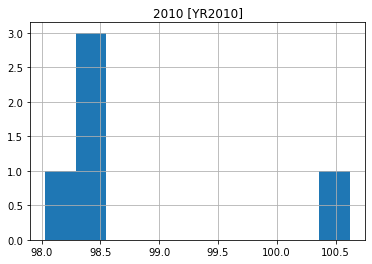

In [600]:
SA_mobile_without_2010.hist()

In [601]:
#South America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

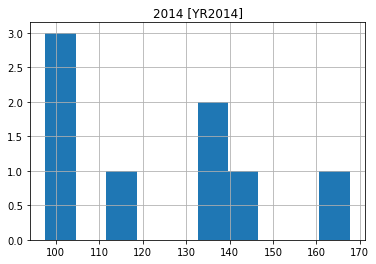

In [602]:
mobile1[mobile1.Region=="South America"].hist(column='2014 [YR2014]')

In [603]:
#South America 2014 without outliers

In [604]:
SA_mobile_without_2014 = mobile1[mobile1.Region=="South America"]
SA_mobile_without_2014 = SA_mobile_without_2014[["Country Name","Region","2014 [YR2014]"]]
SA_mobile_without_2014

,Country Name,Region,2014 [YR2014]
7,Argentina,South America,143.615832
23,Bolivia,South America,97.607289
26,Brazil,South America,138.451183
40,Chile,South America,133.345192
42,Colombia,South America,117.804953
57,Ecuador,South America,104.099195
186,Suriname,South America,167.692983
210,"Venezuela, RB",South America,101.614534


In [605]:
upper, lower = outliers(SA_mobile_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_mobile_without_2014 = SA_mobile_without_2014[(SA_mobile_without_2014["2014 [YR2014]"] > lower) & (SA_mobile_without_2014["2014 [YR2014]"] < upper)]
SA_mobile_without_2014

Upper whisker:  194.13881896250004
Lower Whisker:  49.08155606249997


,Country Name,Region,2014 [YR2014]
7,Argentina,South America,143.615832
23,Bolivia,South America,97.607289
26,Brazil,South America,138.451183
40,Chile,South America,133.345192
42,Colombia,South America,117.804953
57,Ecuador,South America,104.099195
186,Suriname,South America,167.692983
210,"Venezuela, RB",South America,101.614534


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

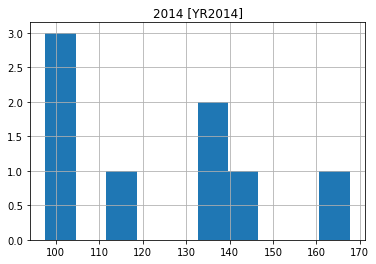

In [606]:
SA_mobile_without_2014.hist()

In [607]:
#Western Asia 2010 with outliers

array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

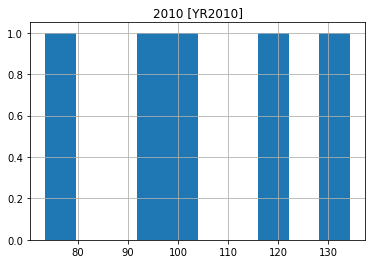

In [608]:
mobile1[mobile1.Region=="Western Asia"].hist(column='2010 [YR2010]')

In [609]:
#Western Asia 2010 without outliers

In [610]:
WA_mobile_without_2010 = mobile1[mobile1.Region=="Western Asia"]
WA_mobile_without_2010 = WA_mobile_without_2010[["Country Name","Region","2010 [YR2010]"]]
WA_mobile_without_2010

,Country Name,Region,2010 [YR2010]
8,Armenia,Western Asia,134.338737
12,Azerbaijan,Western Asia,100.748987
72,Georgia,Western Asia,97.051620
100,Kazakhstan,Western Asia,119.383872
208,Uzbekistan,Western Asia,73.474775


In [611]:
upper, lower = outliers(WA_mobile_without_2010, "2010 [YR2010]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_mobile_without_2010 = WA_mobile_without_2010[(WA_mobile_without_2010["2010 [YR2010]"] > lower) & (WA_mobile_without_2010["2010 [YR2010]"] < upper)]
WA_mobile_without_2010

Upper whisker:  152.88225019499998
Lower Whisker:  63.553242475


,Country Name,Region,2010 [YR2010]
8,Armenia,Western Asia,134.338737
12,Azerbaijan,Western Asia,100.748987
72,Georgia,Western Asia,97.051620
100,Kazakhstan,Western Asia,119.383872
208,Uzbekistan,Western Asia,73.474775


array([[<AxesSubplot:title={'center':'2010 [YR2010]'}>]], dtype=object)

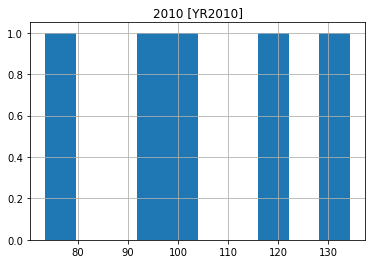

In [612]:
WA_mobile_without_2010.hist()

In [613]:
#Western Asia 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

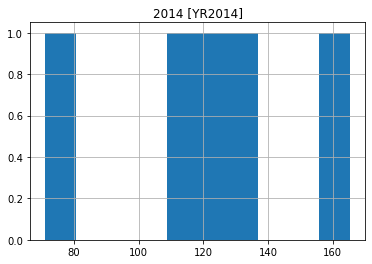

In [614]:
mobile1[mobile1.Region=="Western Asia"].hist(column='2014 [YR2014]')

In [615]:
#Western Asia 2014 without outliers

In [616]:
WA_mobile_without_2014 = mobile1[mobile1.Region=="Western Asia"]
WA_mobile_without_2014 = WA_mobile_without_2014[["Country Name","Region","2014 [YR2014]"]]
WA_mobile_without_2014

,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,118.772363
12,Azerbaijan,Western Asia,111.013461
72,Georgia,Western Asia,133.837665
100,Kazakhstan,Western Asia,165.267504
208,Uzbekistan,Western Asia,71.119845


In [617]:
upper, lower = outliers(WA_mobile_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_mobile_without_2014 = WA_mobile_without_2014[(WA_mobile_without_2014["2014 [YR2014]"] > lower) & (WA_mobile_without_2014["2014 [YR2014]"] < upper)]
WA_mobile_without_2014

Upper whisker:  168.07396955000002
Lower Whisker:  76.77715634999998


,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,118.772363
12,Azerbaijan,Western Asia,111.013461
72,Georgia,Western Asia,133.837665
100,Kazakhstan,Western Asia,165.267504


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

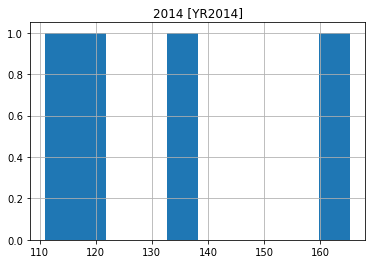

In [618]:
WA_mobile_without_2014.hist()